In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [3]:
xtrain = pd.read_csv("X_train.csv")
xtrain = xtrain.iloc[:, 1:]
xtrain.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x822,x823,x824,x825,x826,x827,x828,x829,x830,x831
0,118345.392781,3104.010883,82378.542430,1086.678601,11395.883550,10.455601,109886.476608,1.054926e+06,101877.946528,2.550290,...,10.769524,10.245068,1021.907543,1031.645762,107440.039766,107083.296966,5559.203921,10.861464,107548.413675,2.299202
1,NaN,5889.055991,97932.067482,1116.564363,12172.212426,10.502997,100372.504488,1.011783e+06,108852.296962,2.579040,...,10.859822,10.088023,988.135968,999.044639,105238.779040,106365.468525,10334.091649,NaN,107841.227180,2.472763
2,95373.022035,6293.442455,93371.369288,1034.722073,11618.142107,10.947611,109337.757279,1.006491e+06,104540.883376,2.573247,...,10.356015,10.514234,995.480813,898.329758,107044.005199,102704.104686,7697.875887,10.277760,103414.594212,NaN
3,105066.272301,3279.162164,119554.079514,1114.014483,12127.235755,10.540204,106215.391332,1.022381e+06,109597.474506,2.693256,...,10.609811,10.991861,1117.179063,867.267810,100617.082858,108893.304959,6549.131099,9.337688,105722.857008,2.484935
4,98957.033333,4177.482190,97239.708338,1049.430921,10417.250336,10.618957,102736.470171,1.086871e+06,103340.057448,2.540610,...,10.397777,NaN,863.943966,1041.278922,105352.672454,101705.692839,5388.312773,12.196382,NaN,1.930136


In [17]:
xtrain.iloc[:,0:10].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1212 entries, 0 to 1211
Data columns (total 10 columns):
x0    1131 non-null float64
x1    1109 non-null float64
x2    1120 non-null float64
x3    1121 non-null float64
x4    1120 non-null float64
x5    1109 non-null float64
x6    1115 non-null float64
x7    1141 non-null float64
x8    1107 non-null float64
x9    1115 non-null float64
dtypes: float64(10)
memory usage: 94.8 KB


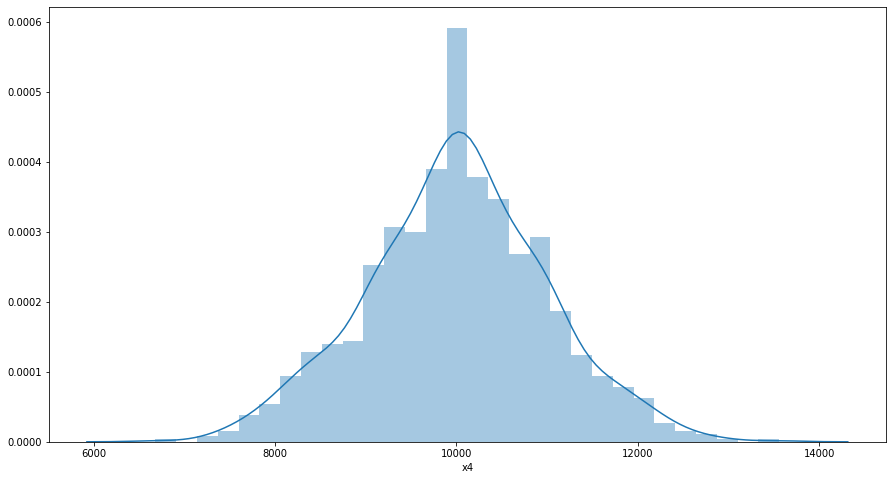

In [14]:
plt.figure(figsize=(15,8))
sns.distplot(xtrain.x4, bins =30)

In [22]:
for i in np.arange(len(xtrain.columns)):
    xtrain.iloc[:, i:i+1].fillna(xtrain.iloc[:, i:i+1].mean(), inplace = True)

xtrain.head()

//anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [52]:
# This cell scales the training data

feature_names = xtrain.columns
scaler = preprocessing.StandardScaler()

xtrain_scaled = scaler.fit_transform(xtrain)
xtrain_scaled = pd.DataFrame(xtrain_scaled, columns = feature_names)
xtrain_scaled.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x822,x823,x824,x825,x826,x827,x828,x829,x830,x831
0,2.003789e+00,-0.655849,-1.886600,0.916929,1.455717,-0.393113,1.842526,0.207068,-1.112314,0.276588,...,0.819901,-1.110028e+00,0.251549,0.313682,0.905023,0.745790,-0.944838,8.892476e-01,9.233435e-01,1.579906e-01
1,3.170291e-15,2.403925,-0.216914,1.232632,2.267203,-0.214877,-1.736539,-1.383793,1.477503,0.468797,...,1.152094,-1.683506e+00,-0.103563,-0.034465,0.101094,0.478006,2.612417,-7.499671e-15,1.029284e+00,1.226602e+00
2,-4.986002e-01,2.848202,-0.706509,0.368077,1.688041,1.457136,1.636103,-1.578900,-0.123474,0.430067,...,-0.701345,-1.271165e-01,-0.026331,-1.110000,0.760386,-0.887858,0.648457,2.731569e-01,-5.722800e-01,1.093697e-14
3,5.572892e-01,-0.463420,2.104230,1.205696,2.220190,-0.074959,0.461499,-0.993009,1.754213,1.232371,...,0.232337,1.617028e+00,1.253338,-1.441711,-1.586810,1.421010,-0.207350,-7.190751e-01,2.628537e-01,1.301543e+00
4,-1.081925e-01,0.523514,-0.291240,0.523456,0.432765,0.221201,-0.847238,1.384981,-0.569382,0.211873,...,-0.547710,-7.135373e-14,-1.409453,0.416555,0.142690,-1.260314,-1.072150,2.298233e+00,-2.105964e-14,-2.114335e+00


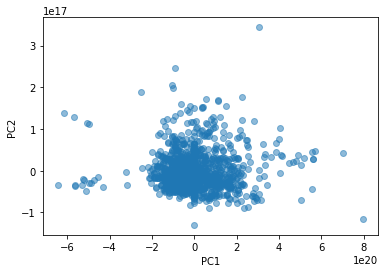

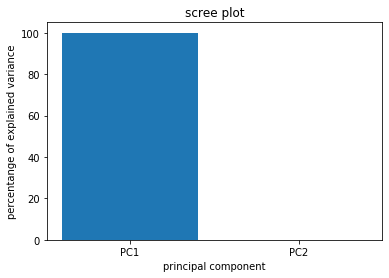

[9.99999891e-01 1.09123626e-07]


In [68]:
# PCA with 2 remaining features/components

pca = PCA(n_components=2)
principal_components = pca.fit_transform(xtrain)
xpca = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2'])

plt.scatter(xpca['PC1'], xpca['PC2'], alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('percentange of explained variance')
plt.xlabel('principal component')
plt.title('scree plot')
plt.show()

print(pca.explained_variance_ratio_)

In [71]:
pca = PCA(n_components=100)
principal_components = pca.fit_transform(xtrain)
print(pca.explained_variance_ratio_)

[9.99999891e-01 1.09123626e-07 8.50306340e-14 6.48823367e-15
 5.79241027e-30 7.75421079e-31 6.55616397e-31 6.16898917e-31
 6.10352575e-31 6.02306018e-31 5.85850502e-31 5.69219249e-31
 5.67044763e-31 5.57869720e-31 5.51528549e-31 5.49619142e-31
 5.36708461e-31 5.30963436e-31 5.19858287e-31 5.11293319e-31
 5.00600376e-31 4.93101189e-31 4.90226014e-31 4.86063861e-31
 4.82764582e-31 4.73362691e-31 4.68788932e-31 4.55559780e-31
 4.50883427e-31 4.45811961e-31 4.39421821e-31 4.39135764e-31
 4.32463660e-31 4.27961670e-31 4.21577613e-31 4.16156584e-31
 4.11110356e-31 4.01138941e-31 3.95392698e-31 3.91449265e-31
 3.85248446e-31 3.74239717e-31 3.73275476e-31 3.65129184e-31
 3.60891083e-31 3.53781103e-31 3.51100705e-31 3.36608175e-31
 3.35684657e-31 3.22463928e-31 3.15041709e-31 2.95576230e-31
 2.47497911e-31 1.27226515e-31 8.81892163e-32 5.25395978e-32
 4.90589817e-32 4.82071809e-32 4.67362208e-32 4.50586358e-32
 4.35270338e-32 4.11399284e-32 3.91159152e-32 3.85092498e-32
 3.82943575e-32 3.792742